## <font size=5> <strong>Heart Disease Prediction By Shreekant Gosavi
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['App.py', 'data.py', 'decision_graph.py', 'decision_tree', 'fail_model', 'graph(2).py', 'graph.py', 'Grok_model', 'heart (1).csv', 'heart (2).csv', 'heart+disease', 'heart+disease.zip', 'heart-disease (1).ipynb', 'heart-disease (3).ipynb', 'heart.csv', 'Heart_disease_prediction.ipynb', 'history.csv', 'history_decision_tree.csv', 'history_predictions.csv', 'history_xgBoost.csv', 'Last_Model', 'Last_Model.rar', 'model', 'model_comparison_results(2).csv', 'model_comparison_results(3).csv', 'model_comparison_results.csv', 'prediction_history.csv', 'ROC.py', 'Script.docx', 'svm_graph.py', 'Testing.py', 'version.py', 'xgboost_md.pkl', 'xgboost_model.pkl']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv(r"heart+disease\new.data")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(18491, 1)

#### Printing out a few columns

In [5]:
dataset.head(5)

,1 15943882 63 1 -9 -9 -9
0,-27 1 145 1 233 -9 50 20
1,1 0 1 2 2 3 1981 0
2,0 0 0 0 1 10.5 6 13
3,150 60 190 90 145 85 0 0
4,2.3 3 -9 -9 0 -9 -9 -9


In [ ]:
dataset.sample(5)

#### Description

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.dropna()

In [ ]:
target_valid=[0,1]
target_invalid = dataset[~dataset['target'].isin(target_valid)]
print(target_invalid)

#### Let's understand our columns better:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

In [ ]:
dataset["target"].unique()

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

In [ ]:
corr_matrix = dataset.corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Tiêu đề
plt.title("Ma trận tương quan", fontsize=14)

# Hiển thị biểu đồ
plt.show()

In [ ]:
print(dataset["target"].value_counts())

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y = dataset["target"]

sns.countplot(x=y)  # Đảm bảo dùng x=y
plt.show()  # Thêm plt.show() để hiển thị biểu đồ trong một số trường hợp

target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

##### We notice, that as expected, the 'sex' feature has 2 unique features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=dataset["sex"], y=y)  # Định rõ x và y
plt.show()  # Hiển thị biểu đồ

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

##### As expected, the CP feature has values from 0 to 3

In [ ]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

In [ ]:
dataset["fbs"].unique()

In [ ]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

In [ ]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

In [ ]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

In [ ]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the Age feature

In [ ]:
dataset["age"].unique()

In [ ]:
mean_age = dataset["age"].mean()
var_age = dataset["age"].var()
min_age = dataset["age"].min()
max_age = dataset["age"].max()
print(f"Mean age: {mean_age}")
print(f"Variance of age: {var_age}")
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")
plt.figure(figsize=(10,6))
sns.histplot(dataset["age"], bins=10, kde=True)

# Thiết lập tiêu đề và nhãn
plt.title("Distribution of Age", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

In [ ]:
sns.countplot(dataset["ca"])

In [ ]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

In [ ]:
sns.barplot(x=dataset["thal"],y=y)

In [ ]:
sns.distplot(dataset["thal"])

### Prep

In [4]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import joblib

# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    105
0    100
Name: count, dtype: int64


## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
Y_train.shape

In [ ]:
Y_test.shape

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### K Nearest Neighbors

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss, confusion_matrix
import joblib
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [52]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [53]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [55]:
# Khởi tạo và huấn luyện mô hình KNN trên dữ liệu đã chuẩn hóa
knn = KNeighborsClassifier(n_neighbors=5)  # Sử dụng 5 hàng xóm gần nhất
start_time = time.time()  # Bắt đầu đo thời gian
knn.fit(X_train_scaled, y_train)  # Sửa: Dùng X_train_scaled (đã chuẩn hóa)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [56]:
# Dự đoán trên tập kiểm tra (dùng dữ liệu đã chuẩn hóa)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [57]:
# Tính các chỉ số đánh giá cho KNN (bao gồm MAE, RMSE, Log Loss, và Training Time)
knn_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1": f1_score(y_test, y_pred_knn),
    "MAE": mean_absolute_error(y_test, y_pred_knn),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_knn)),
    "Log Loss": log_loss(y_test, y_prob_knn),
    "Training Time (s)": training_time
}

In [58]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===")
results_df_knn = pd.DataFrame(knn_metrics, index=["KNN"])
print(results_df_knn)

=== Kết quả đánh giá mô hình K-Nearest Neighbors (KNN) ===
     Accuracy  Precision    Recall        F1       MAE      RMSE  Log Loss  \
KNN  0.834146        0.8  0.893204  0.844037  0.165854  0.407251  0.251112   

     Training Time (s)  
KNN           0.003134  


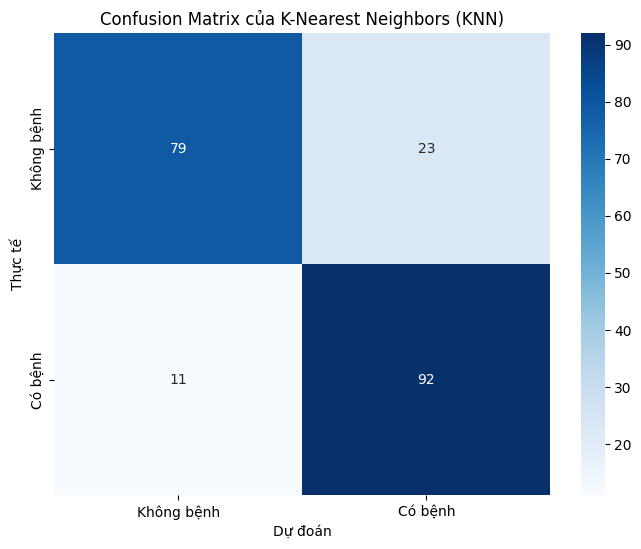

In [59]:
# Vẽ Confusion Matrix cho KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của K-Nearest Neighbors (KNN)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

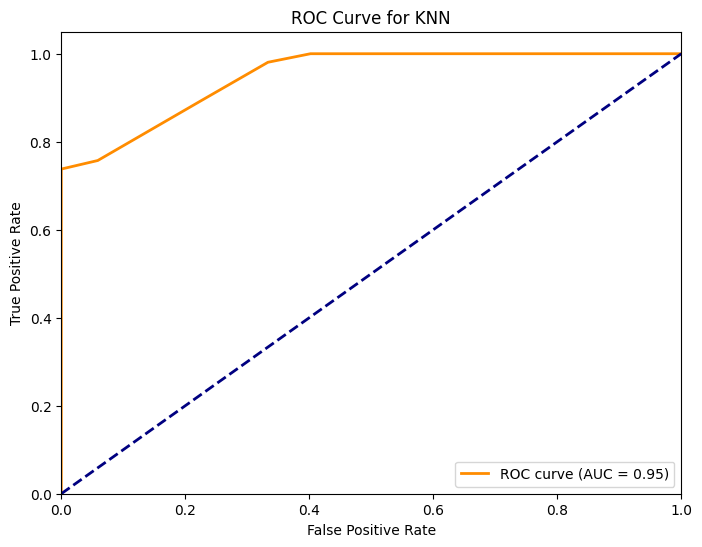

In [11]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN')
plt.legend(loc="lower right")
plt.show()

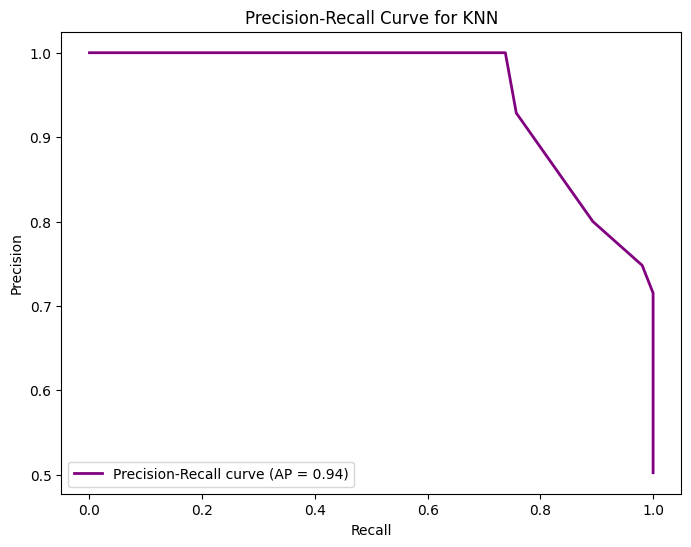

In [14]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_knn)
ap_score = average_precision_score(y_test, y_prob_knn)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for KNN')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Lưu mô hình KNN
model_filename_knn = "/kaggle/working/knn_model_ML(2).pkl"
joblib.dump(knn, model_filename_knn)
print(f"✅ Mô hình KNN đã được lưu tại: {model_filename_knn}")

### Logistic Regression

In [112]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [113]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [114]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [115]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [117]:
# Khởi tạo và huấn luyện mô hình Logistic Regression
lr = LogisticRegression(max_iter=1000)
start_time = time.time()  # Bắt đầu đo thời gian
lr.fit(X_train, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [118]:
# Dự đoán trên tập kiểm tra
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [119]:
# Tính các chỉ số đánh giá
lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1": f1_score(y_test, y_pred_lr),
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    "Log Loss": log_loss(y_test, y_prob_lr),
    "Training Time (s)": training_time
}

In [ ]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
# lr_metrics["CV_Accuracy"] = cv_scores_lr.mean()

In [120]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình Logistic Regression ===")
results_df_lr = pd.DataFrame(lr_metrics, index=["Logistic Regression"])
print(results_df_lr)

# Kiểm tra overfitting
# train_pred_lr = lr.predict(X_train)
# train_accuracy_lr = accuracy_score(y_train, train_pred_lr)
# print(f"Accuracy trên tập huấn luyện: {train_accuracy_lr:.4f}")
# print(f"Accuracy trên tập kiểm tra: {lr_metrics['Accuracy']:.4f}")


=== Kết quả đánh giá mô hình Logistic Regression ===
                     Accuracy  Precision    Recall        F1       MAE  \
Logistic Regression  0.795122   0.756303  0.873786  0.810811  0.204878   

                         RMSE  Log Loss  Training Time (s)  
Logistic Regression  0.452635  1.112508           0.176879  


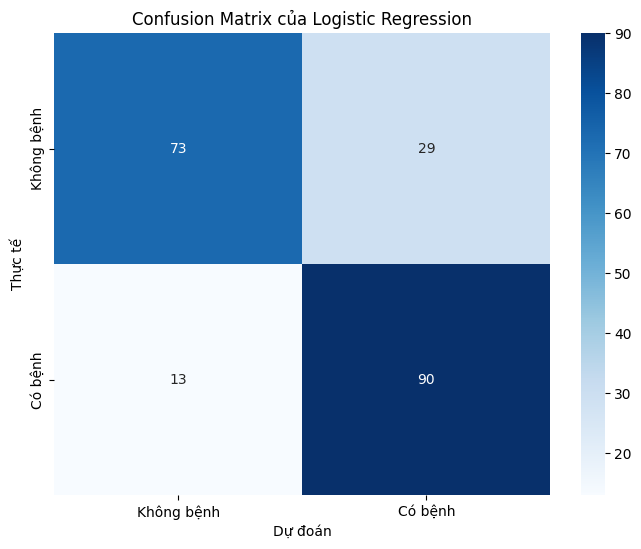

In [24]:
# Vẽ Confusion Matrix cho Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Logistic Regression")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

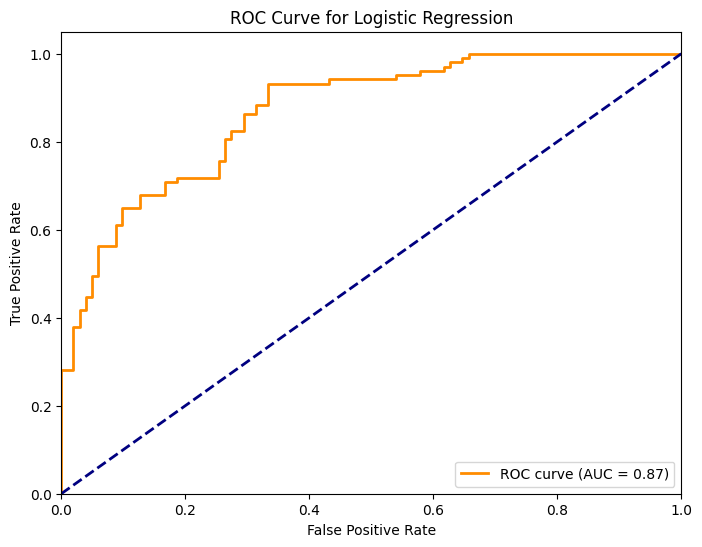

In [25]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

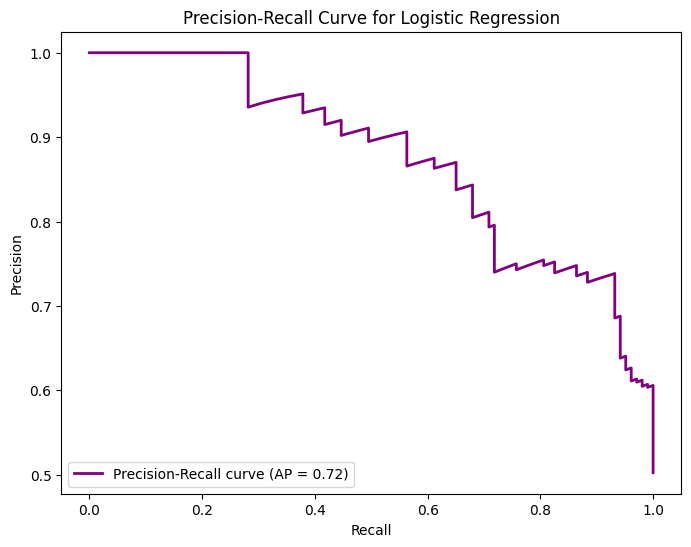

In [26]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_lr)
ap_score = average_precision_score(y_test, y_pred_lr)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc="lower left")
plt.show()

In [27]:
# Lưu mô hình Logistic Regression
model_filename_lr = "/kaggle/working/logistic_regression_model_ML(3).pkl"
joblib.dump(lr, model_filename_lr)
print(f"✅ Mô hình Logistic Regression đã được lưu tại: {model_filename_lr}")

✅ Mô hình Logistic Regression đã được lưu tại: /kaggle/working/logistic_regression_model_ML(3).pkl


### SVM

In [28]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [29]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [30]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [31]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [33]:
# Khởi tạo và huấn luyện mô hình SVM
svm = SVC(kernel='rbf', probability=True, random_state=42)
start_time = time.time()  # Bắt đầu đo thời gian
svm.fit(X_train, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [34]:
# Dự đoán trên tập kiểm tra
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [35]:
# Tính các chỉ số đánh giá
svm_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1": f1_score(y_test, y_pred_svm),
    "MAE": mean_absolute_error(y_test, y_pred_svm),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_svm)),
    "Log Loss": log_loss(y_test, y_prob_svm),
    "Training Time (s)": training_time
}

In [36]:
# Hiển thị kết quả dưới dạng bảng
print("=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===")
results_df_svm = pd.DataFrame(svm_metrics, index=["SVM"])
print(results_df_svm)

=== Kết quả đánh giá mô hình Support Vector Machine (SVM) ===
     Accuracy  Precision    Recall        F1       MAE      RMSE  Log Loss  \
SVM  0.682927   0.661017  0.757282  0.705882  0.317073  0.563093  1.041199   

     Training Time (s)  
SVM           0.168544  


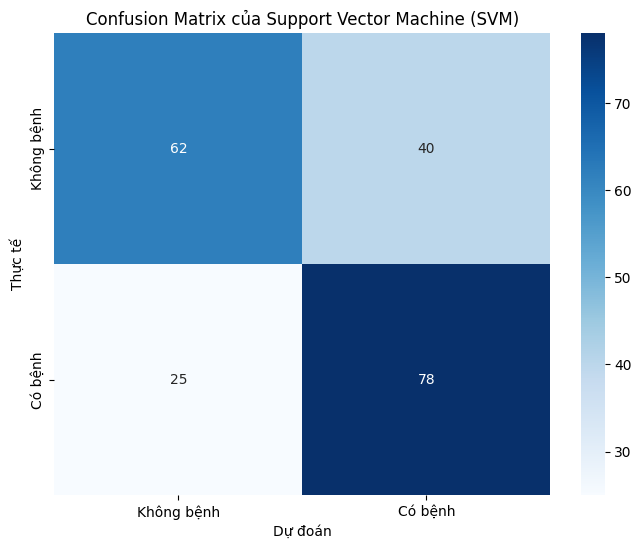

In [37]:
# Vẽ Confusion Matrix cho SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Support Vector Machine (SVM)")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

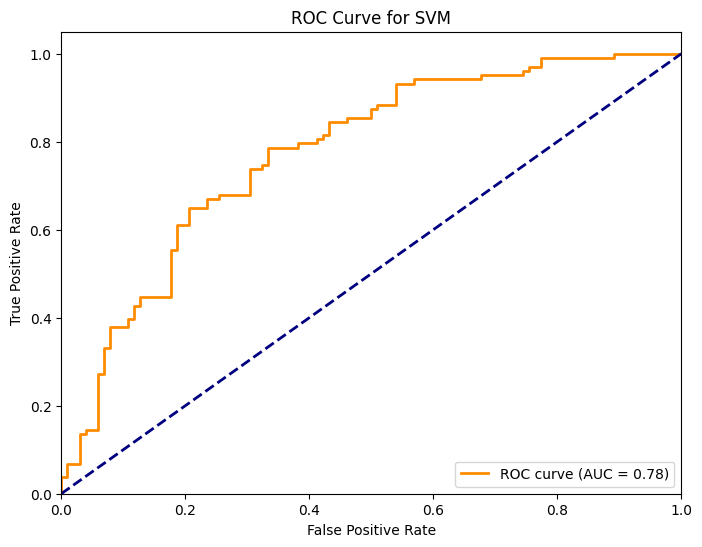

In [38]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

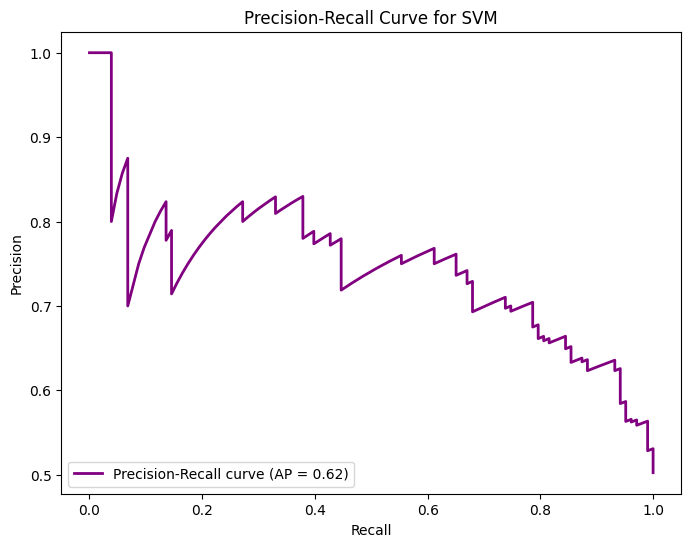

In [39]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_svm)
ap_score = average_precision_score(y_test, y_pred_svm)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Lưu mô hình SVM
model_filename_svm = "/kaggle/working/svm_model_ML.pkl"
joblib.dump(svm, model_filename_svm)
print(f"✅ Mô hình SVM đã được lưu tại: {model_filename_svm}")

### XG Boost

In [60]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [61]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [62]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [63]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [65]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [66]:
# Khởi tạo và huấn luyện mô hình XGBoost
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=3,           # Giảm độ sâu cây
    n_estimators=50,       # Giảm số lượng cây
    learning_rate=0.1,     # Giảm tốc độ học
    reg_lambda=1.0,        # Thêm L2 regularization
    reg_alpha=0.5          # Thêm L1 regularization
)
start_time = time.time()  # Bắt đầu đo thời gian
xgb.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)

In [67]:
# Dự đoán trên tập kiểm tra
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [68]:
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1": f1_score(y_test, y_pred_xgb),
    "MAE": mean_absolute_error(y_test, y_pred_xgb),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    "Log Loss": log_loss(y_test, y_prob_xgb),
    "Training Time (s)": training_time
}

In [ ]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_xgb = cross_val_score(xgb, X_train_scaled, y_train, cv=5, scoring='accuracy')
# xgb_metrics["CV_Accuracy"] = cv_scores_xgb.mean()

In [69]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình XGBoost ===")
results_df_xgb = pd.DataFrame(xgb_metrics, index=["XGBoost"])
print(results_df_xgb)


=== Kết quả đánh giá mô hình XGBoost ===
         Accuracy  Precision    Recall        F1       MAE      RMSE  \
XGBoost  0.858537   0.824561  0.912621  0.866359  0.141463  0.376116   

         Log Loss  Training Time (s)  
XGBoost  0.278201           0.065982  


In [70]:
# Kiểm tra overfitting
train_pred_xgb = xgb.predict(X_train_scaled)
train_accuracy_xgb = accuracy_score(y_train, train_pred_xgb)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_xgb:.4f}")
print(f"Accuracy trên tập kiểm tra: {xgb_metrics['Accuracy']:.4f}")

Accuracy trên tập huấn luyện: 0.9463
Accuracy trên tập kiểm tra: 0.8585


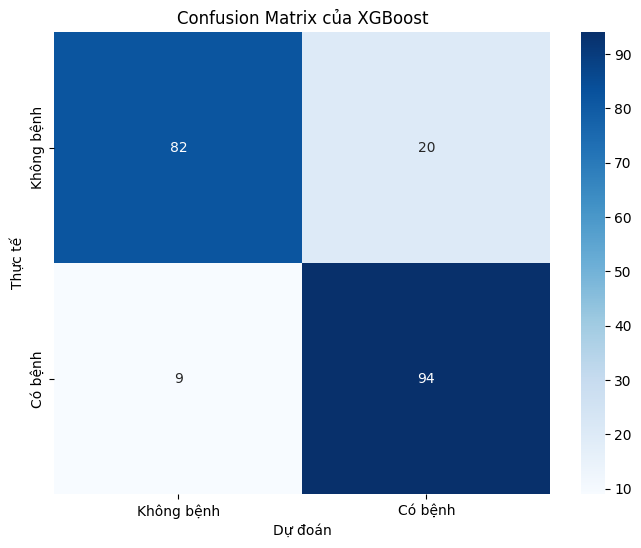

In [71]:
# Vẽ Confusion Matrix cho XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của XGBoost")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

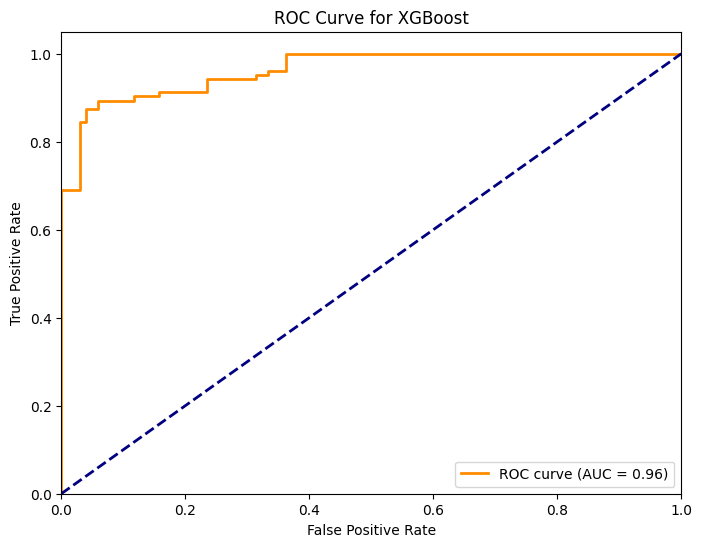

In [72]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

### 

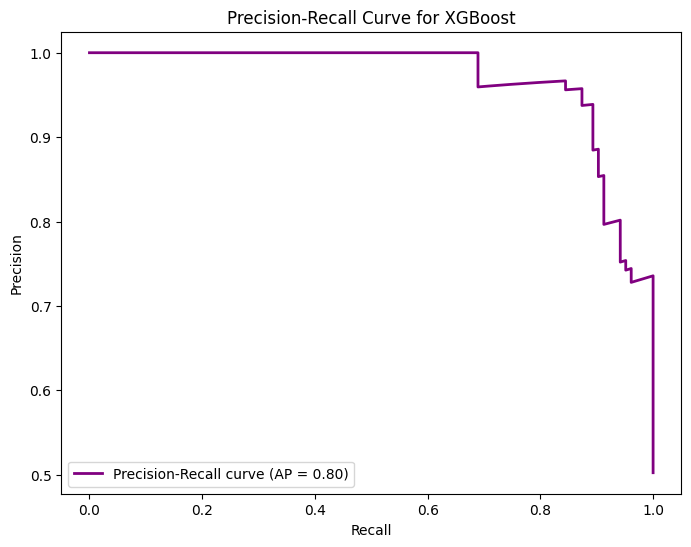

In [73]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_xgb)
ap_score = average_precision_score(y_test, y_pred_xgb)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Lưu mô hình XGBoost dưới dạng JSON
model_filename_xgb = "/kaggle/working/xgboost_model_ML(3).json"
xgb.save_model(model_filename_xgb)  # Sử dụng phương thức save_model của XGBoost để lưu dưới dạng JSON
print(f"✅ Mô hình XGBoost đã được lưu dưới dạng JSON tại: {model_filename_xgb}")

### Decision Tree

In [74]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [75]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [76]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [77]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

In [79]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [80]:
# Khởi tạo và huấn luyện mô hình Decision Tree
dt = DecisionTreeClassifier(
    max_depth=5,            # Giảm độ sâu cây
    min_samples_split=10,   # Tăng số mẫu tối thiểu để chia nhánh
    min_samples_leaf=5,     # Tăng số mẫu tối thiểu ở lá
    random_state=42
)
start_time = time.time()  # Bắt đầu đo thời gian
dt.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)


In [81]:
# Dự đoán trên tập kiểm tra
y_pred_dt = dt.predict(X_test_scaled)
y_prob_dt = dt.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [82]:
# Tính các chỉ số đánh giá
dt_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1": f1_score(y_test, y_pred_dt),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt)),
    "Log Loss": log_loss(y_test, y_prob_dt),
    "Training Time (s)": training_time
}

In [ ]:
# Sử dụng Cross-Validation để đánh giá
# cv_scores_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')
# dt_metrics["CV_Accuracy"] = cv_scores_dt.mean()

In [83]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình Decision Tree ===")
results_df_dt = pd.DataFrame(dt_metrics, index=["Decision Tree"])
print(results_df_dt)


=== Kết quả đánh giá mô hình Decision Tree ===
               Accuracy  Precision    Recall        F1       MAE      RMSE  \
Decision Tree  0.814634   0.768595  0.902913  0.830357  0.185366  0.430541   

               Log Loss  Training Time (s)  
Decision Tree  0.877725            0.00405  


In [84]:
# Kiểm tra overfitting
train_pred_dt = dt.predict(X_train_scaled)
train_accuracy_dt = accuracy_score(y_train, train_pred_dt)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_dt:.4f}")
print(f"Accuracy trên tập kiểm tra: {dt_metrics['Accuracy']:.4f}")

Accuracy trên tập huấn luyện: 0.9195
Accuracy trên tập kiểm tra: 0.8146


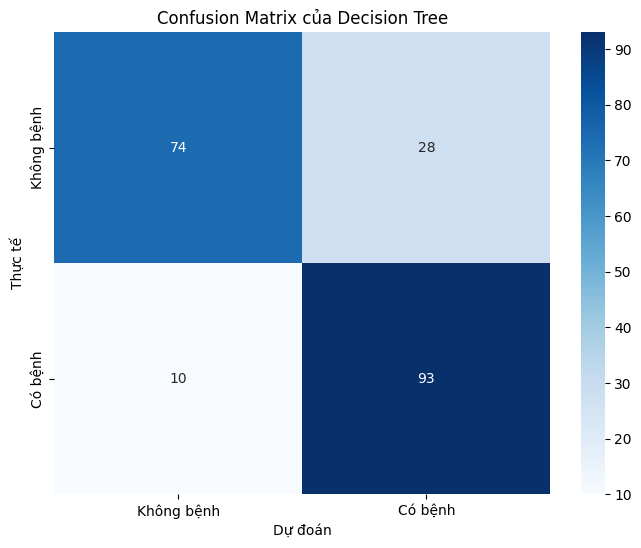

In [85]:
# Vẽ Confusion Matrix cho Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Decision Tree")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

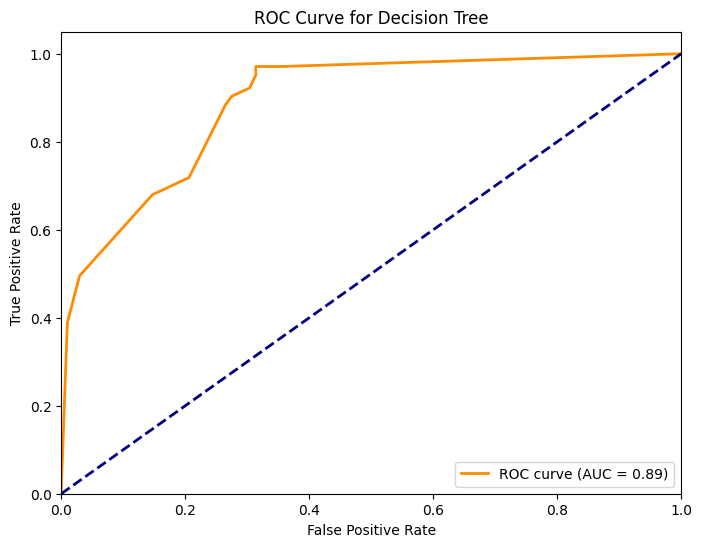

In [86]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_dt)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()

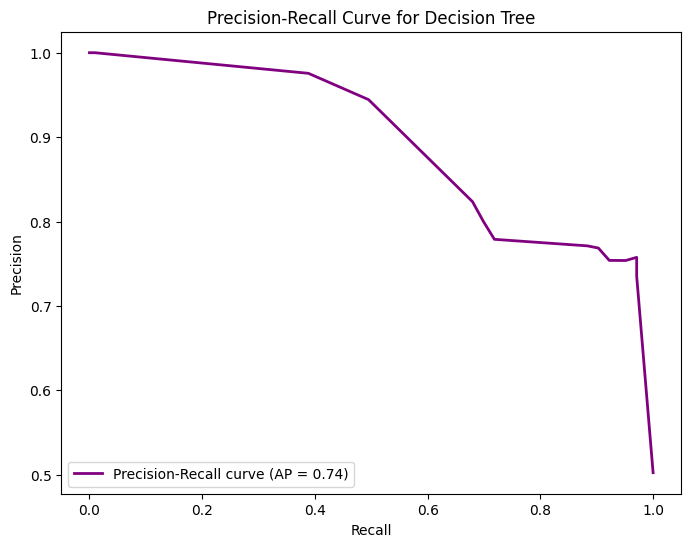

In [87]:
# Vẽ Precision-Recall Curve
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_dt)
ap_score = average_precision_score(y_test, y_pred_dt)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Lưu mô hình Decision Tree
model_filename_dt = "/kaggle/working/decision_tree_model_ML(2).pkl"
joblib.dump(dt, model_filename_dt)
print(f"✅ Mô hình Decision Tree đã được lưu tại: {model_filename_dt}")

### Random Forest

In [88]:
# Import các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import time  # Thêm thư viện time để đo thời gian huấn luyện
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, average_precision_score, mean_absolute_error, mean_squared_error, log_loss
import joblib

In [89]:
# Đọc dữ liệu
dataset = pd.read_csv("/kaggle/input/heartdee/heart (2).csv")

In [90]:
# Chia dữ liệu thành features (X) và target (y)
X = dataset.drop('target', axis=1)
y = dataset['target']

In [91]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
# Chuẩn hóa dữ liệu (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chỉ fit trên tập huấn luyện
X_test_scaled = scaler.transform(X_test)  # Chỉ transform trên tập kiểm tra

In [93]:
# Kiểm tra phân bố lớp trong tập kiểm tra
print("Phân bố lớp trong tập kiểm tra:")
print(y_test.value_counts())

Phân bố lớp trong tập kiểm tra:
target
1    103
0    102
Name: count, dtype: int64


In [94]:
# Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(
    n_estimators=50,       # Tăng số lượng cây
    max_depth=5,           # Tăng độ sâu cây
    min_samples_split=5,    # Giảm số mẫu tối thiểu để chia nhánh
    min_samples_leaf=2,     # Giảm số mẫu tối thiểu ở lá
    random_state=42
)
start_time = time.time()  # Bắt đầu đo thời gian
rf.fit(X_train_scaled, y_train)
training_time = time.time() - start_time  # Tính thời gian huấn luyện (giây)


In [95]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]  # Xác suất lớp dương

In [96]:
# Tính các chỉ số đánh giá
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1": f1_score(y_test, y_pred_rf),
    "MAE": mean_absolute_error(y_test, y_pred_rf),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
    "Log Loss": log_loss(y_test, y_prob_rf),
    "Training Time (s)": training_time
}

In [97]:
# Sử dụng Cross-Validation để đánh giá
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')
rf_metrics["CV_Accuracy"] = cv_scores_rf.mean()

NameError: name 'cross_val_score' is not defined

In [98]:
# Hiển thị kết quả dưới dạng bảng
print("\n=== Kết quả đánh giá mô hình Random Forest ===")
results_df_rf = pd.DataFrame(rf_metrics, index=["Random Forest"])
print(results_df_rf)


=== Kết quả đánh giá mô hình Random Forest ===
               Accuracy  Precision    Recall        F1       MAE      RMSE  \
Random Forest  0.892683   0.840336  0.970874  0.900901  0.107317  0.327593   

               Log Loss  Training Time (s)  
Random Forest   0.30719           0.082859  


In [ ]:
# Kiểm tra overfitting
train_pred_rf = rf.predict(X_train_scaled)
train_accuracy_rf = accuracy_score(y_train, train_pred_rf)
print(f"Accuracy trên tập huấn luyện: {train_accuracy_rf:.4f}")
print(f"Accuracy trên tập kiểm tra: {rf_metrics['Accuracy']:.4f}")

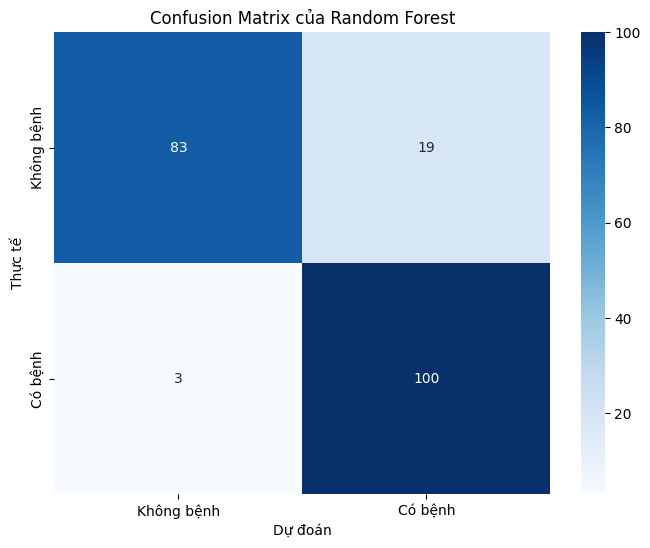

In [99]:
# Vẽ Confusion Matrix cho Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Không bệnh", "Có bệnh"], yticklabels=["Không bệnh", "Có bệnh"])
plt.title("Confusion Matrix của Random Forest")
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.show()

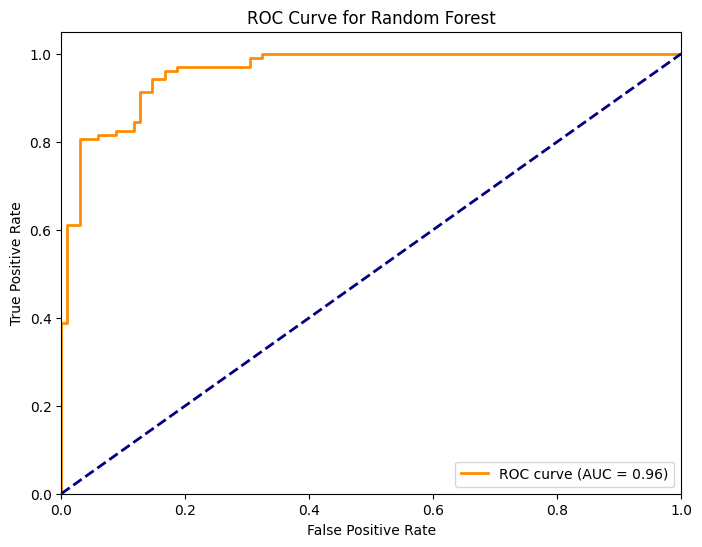

In [100]:
# Vẽ ROC Curve (với AUC)
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

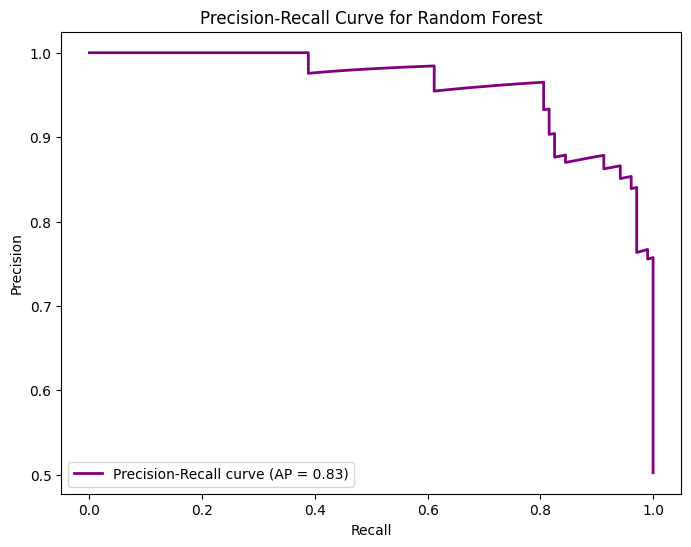

In [101]:
# Vẽ Precision-Recall Curve`
plt.figure(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_prob_rf)
ap_score = average_precision_score(y_test, y_pred_rf)
plt.plot(recall, precision, color='purple', lw=2, label=f'Precision-Recall curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest')
plt.legend(loc="lower left")
plt.show()

In [ ]:
# Lưu mô hình Random Forest
model_filename_rf = "/kaggle/working/random_forest_model_ML(3).pkl"
joblib.dump(rf, model_filename_rf)
print(f"✅ Mô hình Random Forest đã được lưu tại: {model_filename_rf}")

## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### Hey arbaaz there random forest has good result as compare to other algorithms <br> <br>